# Objective 
---

**`Report: The effect of weather conditions on the number of accidents`**


This report investigates the correlation between weather conditions and the occurrence of accidents using open data from [Mobilithek](https://download.statistik-berlin-brandenburg.de/102d8fde949519f6/d99e618a1ec6/AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2018_Datensatz.csv) and [OpenWeather](https://open-meteo.com/en/docs/historical-weather-api). The objective is to determine whether weather conditions play a significant role in influencing the number of accidents.



## Datasources
---
<!-- Describe each datasources you plan to use in a section. Use the prefic "DatasourceX" where X is the id of the datasource. -->

### Datasource1: [Road traffic accidents by accident location in Berlin 2018]((https://download.statistik-berlin-brandenburg.de/102d8fde949519f6/d99e618a1ec6/AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2018_Datensatz.csv))
* Data Type: **`CSV`**
* Road traffic accidents with personal injury by accident location with street name, GPS coordinates and LOR planning area in Berlin 2018; Accident month, weekday, hour, Accident type and category

* usage: The number of accidents per category `(total ,car, bike...etc)` is grouped by a monthly basis.  

### Datasource2: [Open Meteo Weather API](https://open-meteo.com/en/docs/historical-weather-api)
* Data Type: **`JSON`**

* OpenMeteo API is a free and open-source weather API that provides access to global and historical weather data. It offers a range of endpoints to retrieve weather forecasts, current conditions, and historical weather data. OpenMeteo API is easy to use and provides a variety of data formats, including csv & json.

* usage: Weather data are aggregated on a monthly basis too. Four weather indexes were selected from the data supplied by
OpenMeteo `'temperature_mean', 'windspeed_max', 'snowfall_sum', 'rain_sum'`.

## Install dependencies
---
install all required dependencies.

In [3]:
# %pip install pandas
# %pip install matplotlib
# %pip install 'SQLAlchemy==1.4.46'

## Load data
---
Create a pandas dataframe using the local sqlite file.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_sql_table('berlin_dataset', 'sqlite:///berlin_dataset.sqlite')

### Data example
---
The output of our data engineering pipeline involves combining the weather and accidents datasets by performing a join operation based on the month.


In [5]:
df

,date,total,Bikes,Cars,Pedestrains,MotorBikes,Goods Trucks,Others,Fatal,serious_injury,minor_injury,temperature_mean,windspeed_max,precipitation_sum,snowfall_sum,rain_sum
0,2018/01,884,245,758,247,50,28,129,3,161,720,3.187097,38.6,69.7,5.81,62.6
1,2018/02,730,201,640,153,39,30,101,3,119,608,-1.232143,22.2,8.5,1.47,7.1
2,2018/03,802,222,700,154,65,27,110,2,109,691,1.454839,30.9,58.0,9.10,46.1
3,2018/04,1217,453,1008,148,214,38,168,4,202,1011,12.880000,32.6,39.2,1.61,36.9
4,2018/05,1462,679,1174,190,257,62,184,2,261,1199,17.793548,29.9,9.8,0.00,9.8
5,2018/06,1466,647,1153,177,289,46,183,3,212,1251,19.320000,30.7,26.6,0.00,26.6
6,2018/07,1236,547,987,125,241,41,162,3,179,1054,21.783871,23.1,42.0,0.00,42.0
7,2018/08,1312,553,1017,135,274,32,179,4,223,1085,22.435484,27.0,20.5,0.00,20.5
8,2018/09,1328,572,1027,150,292,42,148,5,223,1100,16.993333,32.3,33.1,0.00,33.1
9,2018/10,1248,448,1037,176,225,42,177,3,186,1059,11.796774,34.5,13.3,0.00,13.3


## `Does weather really affect the accidents rate?`
---

To answer this question lets compute and visualize the correlation between each weather condition and the different accident categories.

In [25]:
weather_conditions = ['temperature_mean', 'windspeed_max', 'snowfall_sum', 'rain_sum']
accidents = ['total', 'Bikes', 'Cars', 'MotorBikes',"Pedestrains" , 'Others']
# Compute correlation matrix
corr_matrix = df[accidents + weather_conditions].corr()

def plot_correlation(weather_condition):
    # Plot scatter plots
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, ax in enumerate(axes.flat):
        acc_type = accidents[i]
        x = df[weather_condition]
        y = df[acc_type]
        ax.scatter(x, y)
        ax.set_xlabel(weather_condition)
        ax.set_ylabel(acc_type)
        ax.set_title(f'Correlation: {corr_matrix.loc[weather_condition, acc_type]:.2f}')

    plt.tight_layout()
    plt.show()

## *1. Temperature Mean:*

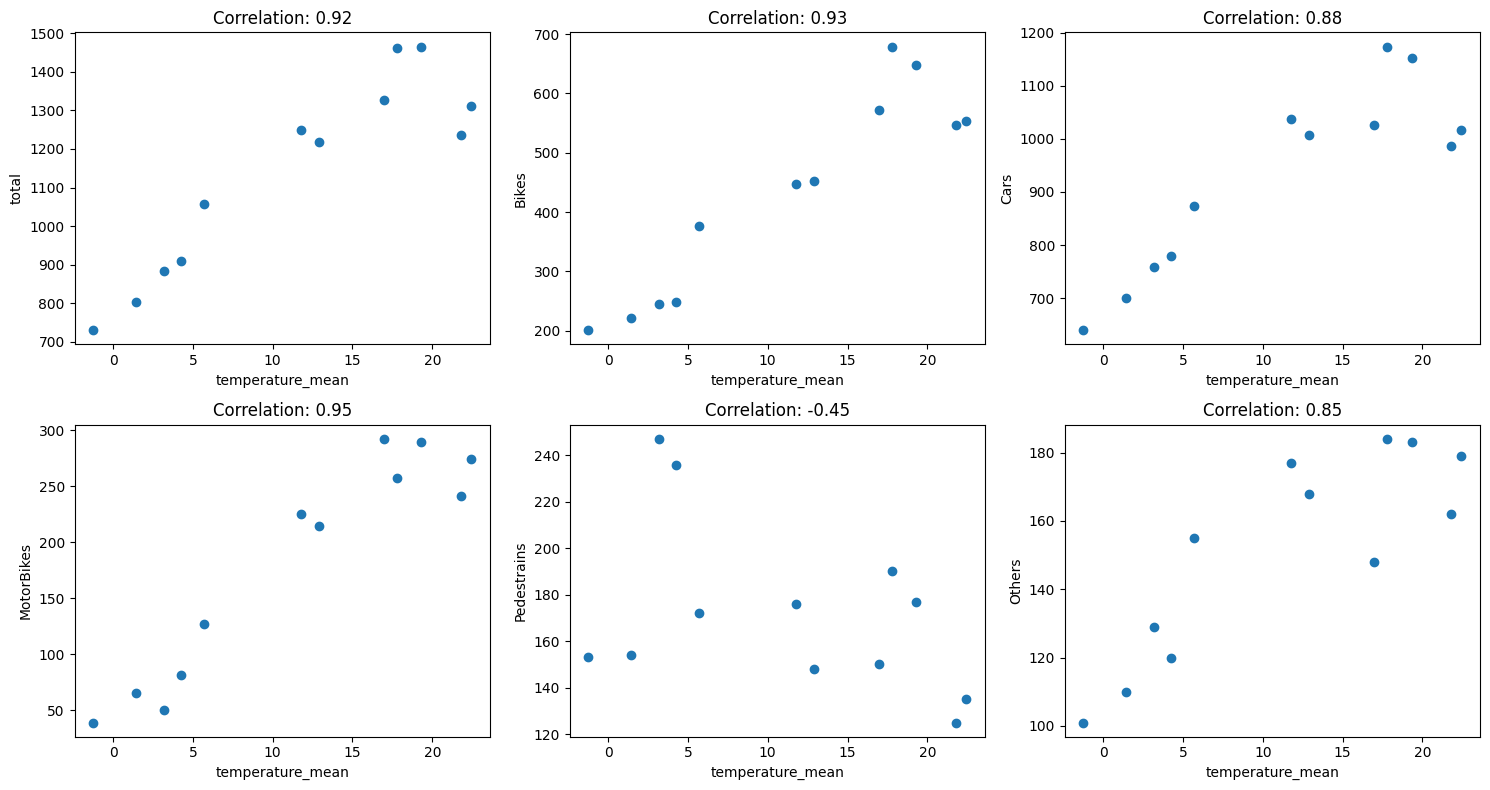

In [26]:
weather_condition = 'temperature_mean'
plot_correlation(weather_condition)


The temperature_mean exhibits a strong positive correlation with the number of accidents across all categories, except pedestrains. Meaning as the temperature increases, the number of accidents tends to rise as well. A possible explanation for this could be that warmer weather conditions lead to increased outdoor activities and more vehicles on the road, thereby increasing the likelihood of accidents.

## *2. Wind Speed Max:*


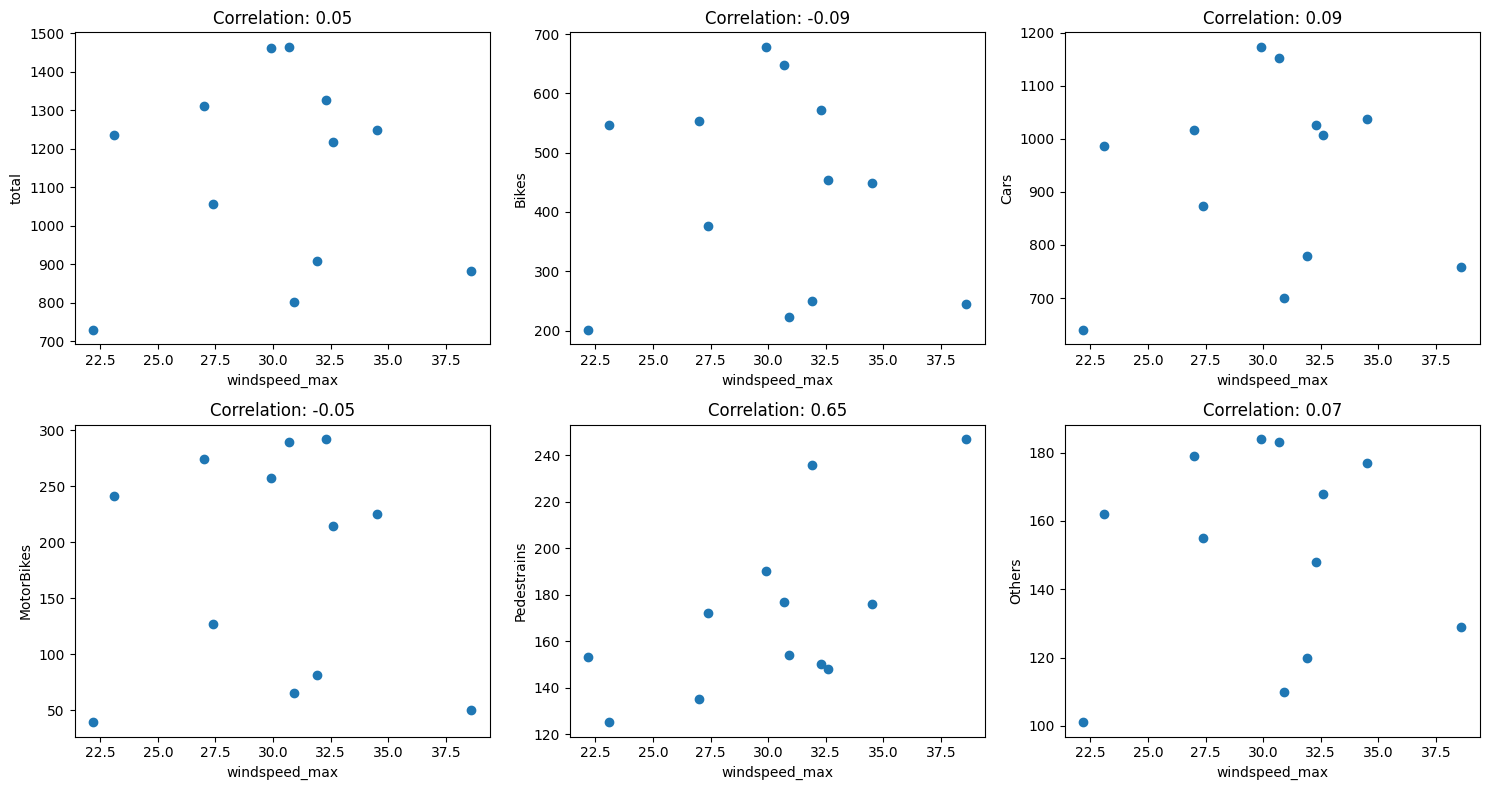

In [27]:
weather_condition = 'windspeed_max'
plot_correlation(weather_condition)


The correlation coefficient between wind speed and the number of accidents is generally weak across all categories. Wind speed does not seem to have a significant impact on accident rates.

## *3. Snowfall sum*

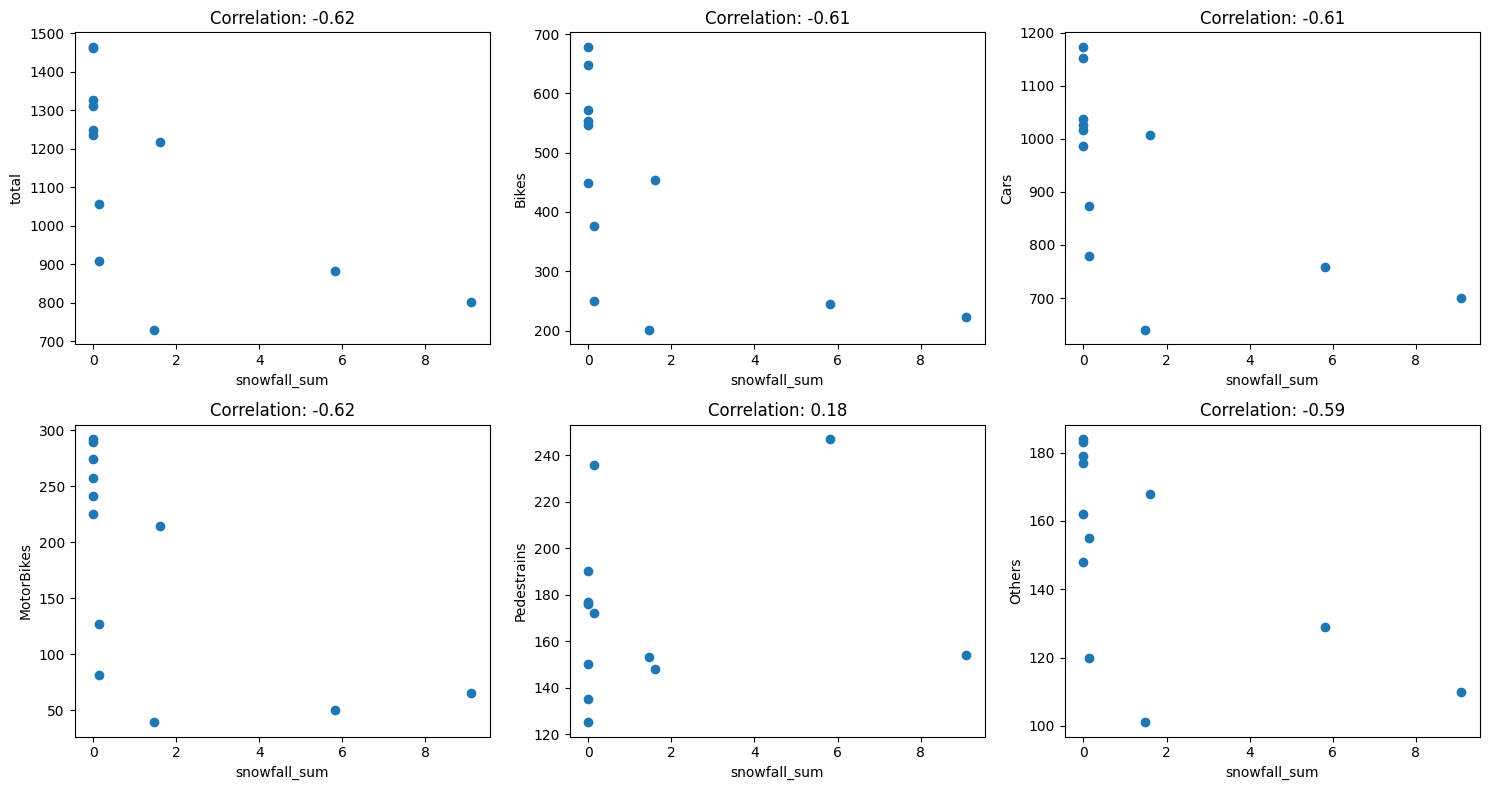

In [28]:
weather_condition = 'snowfall_sum'
plot_correlation(weather_condition)


Although snowfall presence on the road can lead to slippery conditions and reduced visibility. It has negative correlation with the number of accidents. The inverse of our temperature theory is a plausible answer. Meaning, outdoor activities are less common during the cold months. Hence, less people on the roads to be part of accidents.

## *4. Rain sum*

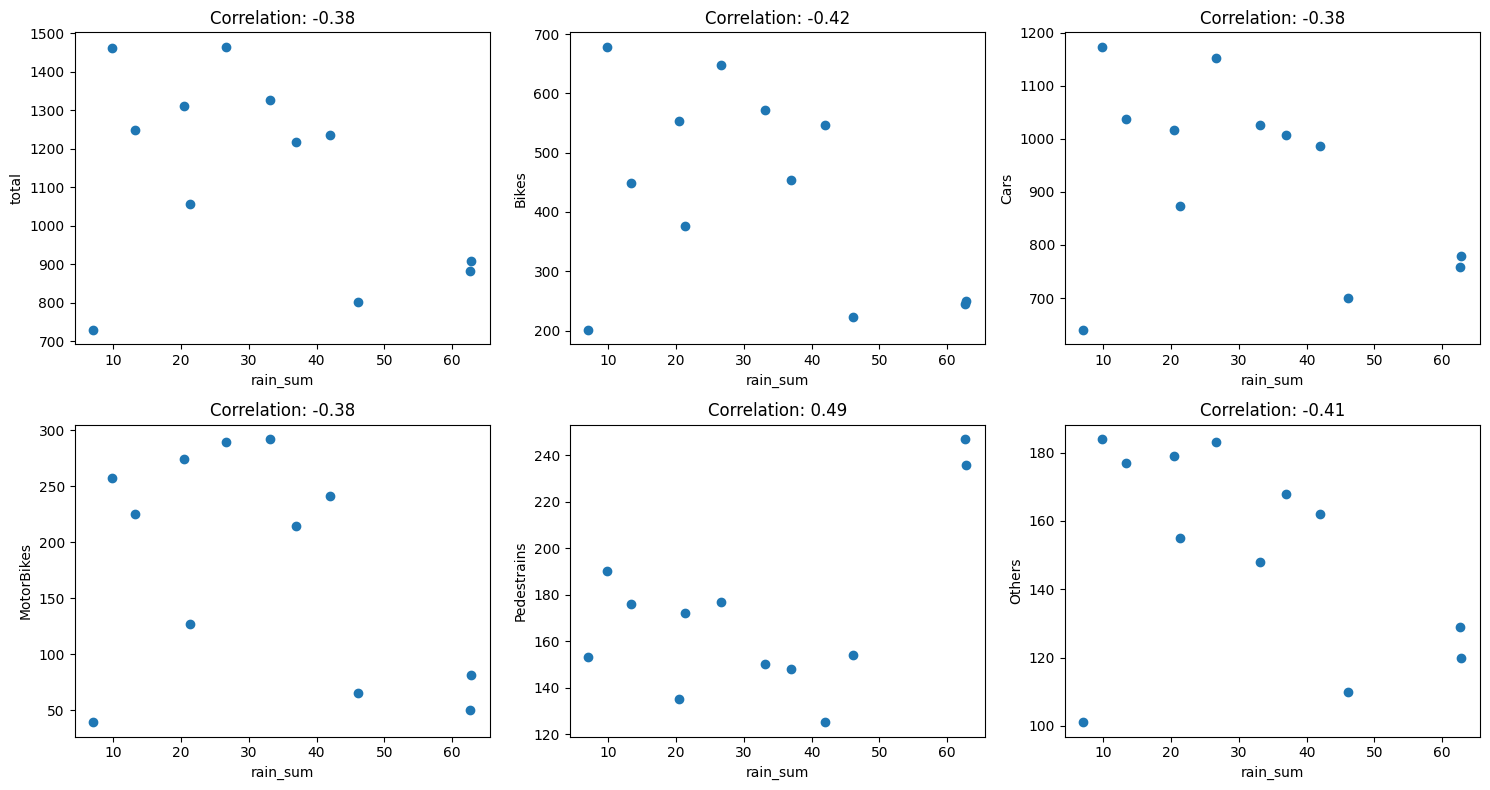

In [29]:
weather_condition = 'rain_sum'
plot_correlation(weather_condition)


The same previous explanation can be used for rain_sum too. Although Its important to note rain positively impacts the `pedestrians` accidents number slightly.

# Conclusion

In conclusion, weather conditions play a crucial role in the number of accidents. Higher temperatures are associated with increased accident rates across all transportation modes, while snowfall and rainfall tend to have a mitigating effect on accident occurrence. Wind speed has a relatively minor impact on accident rates. These factors can be taken into consideration when designing road safety measures, and promoting awareness campaigns to minimize accidents in various weather conditions.




